# Activity 12 - Bagging and Boosting

***
##### CS 434 - Data Mining and Machine Learning
##### Oregon State University-Cascades
***

# Load packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Dataset

[Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (`'yes'`) or not (`'no'`) subscribed.



#### Features
* **age** (numeric)
* **job** : type of job (categorical) `'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'`
* **marital** : marital status (categorical) `'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed`
* **education** (categorical): `'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'`
* **default**: has credit in default? (categorical) `'no','yes','unknown'`
* **housing**: has housing loan? (categorical) `'no','yes','unknown'`
* **loan**: has personal loan? (categorical) `'no','yes','unknown'`
* **contact**: contact communication type (categorical) `'cellular','telephone'`
* **month**: last contact month of year (categorical) `'jan', 'feb', 'mar', ..., 'nov', 'dec'`
* **day_of_week**: last contact day of the week (categorical) `'mon','tue','wed','thu','fri'`
* **duration**: last contact duration, in seconds (numeric). 
* **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; `999` means client was not previously contacted)
* **previous**: number of contacts performed before this campaign and for this client (numeric)
* **poutcome**: outcome of the previous marketing campaign (categorical) `'failure','nonexistent','success'`
* **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
* **cons.price.idx**: consumer price index - monthly indicator (numeric)
* **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
* **euribor3m**: euribor 3 month rate - daily indicator (numeric)
* **nr.employed**: number of employees - quarterly indicator (numeric)


#### Target variable:
* **y**: has the client subscribed a term deposit? (binary: `'yes','no'`)

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
zip_file = 'bank.zip'
dat_file = 'bank.csv'           # exercise 1-5
# dat_file = 'bank-full.csv'     # exercise 6  

*** 
# Exercise #1 - Load data
*** 

##### 1.1 `wget` the `url`

In [46]:
# fetch file, then comment out this line
!wget $url

--2020-05-07 16:22:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip.1’

bank.zip.1          100%[===================>] 565.47K  1.72MB/s    in 0.3s    

2020-05-07 16:22:59 (1.72 MB/s) - ‘bank.zip.1’ saved [579043/579043]



##### 1.2 Unzip `zip_file`

In [68]:
# unzip, then comment out this line
!unzip $zip_file

Archive:  bank.zip
replace bank-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-full.csv           
replace bank-names.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-names.txt          
replace bank.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank.csv                


##### 1.3 Read the `dat_file` into new dataframe `df`.

In [69]:
# read the dataframe
df = pd.read_csv(dat_file, delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


##### 1.4 Describe dataframe

In [70]:
# describe df
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##### 1.5 Count values in `'education'`

In [71]:
# count values for 'education'
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

> Don't overcomplicate.  The above takes one simple pandas' command.

*** 
# Exercise #2 - Prepare dataset
*** 

##### 2.1 Encode categorical features and class label

In [72]:
# encode all attributes
df = df.apply(LabelEncoder().fit_transform)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


A few of the features are numeric, but some have other issues (e.g., special `-1` value).  

> Therefore, just encode **all** of the features. It makes it a one-liner with pandas/sklearn.  

This is fine for some algorithms, like a decision tree (used below), but would not be desirable for a mathematical model, such as logistic regression.

###### Self Check

In [0]:
if dat_file == 'bank.csv' :
  assert df.iloc[0,3] == 0 and df.iloc[1,3] == 1
else:
  assert df.iloc[0,3] == 2 and df.iloc[1,3] == 1

##### 2.2 Split `X` and `y`

In [0]:
# split X and y
X, y = df.iloc[:, :-1], df.iloc[:, -1]

##### 2.3 Partition to train and test sets with hold-out

* test proportion of 50%
* `random_state=1`
* stratify by `y`

In [0]:
# partition train and test set
X_train, X_test, y_train, y_test =\
            train_test_split(X, y, 
                             test_size=0.5, 
                             random_state=1,
                             stratify=y)

##### 2.4 Print the shapes of your four sets

In [76]:
# print shapes of train and test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22605, 16) (22606, 16) (22605,) (22606,)


*** 
# Exercise #3 - Baseline decision tree
*** 

##### 3.1 Build a decision tree

* entropy
* no max depth
* `random_state=1`

In [77]:
# create Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', random_state=1)
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

###### Self Check

```python
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
```

##### 3.2 Train and test your tree

* predict both `X_train` and `X_test`
* save predictions for both (e.g., `y_train_pred` and `y_test_pred`)

In [78]:
# train decision tree
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.873


##### 3.3 Determine accuracy and F$_1$ score (train and test set)

In [79]:
# print accuracy and F1
print('accuracy train: ', accuracy_score(y_train, y_train_pred))
print('f1 train: ', f1_score(y_train, y_train_pred))
print('accuracy test: ', accuracy_score(y_test, y_test_pred))
print('f1 test: ', f1_score(y_test, y_test_pred))

accuracy train:  1.0
f1 train:  1.0
accuracy test:  0.8729540829868176
f1 test:  0.46237364283040056


##### Self Check

The accuracy and F$_1$ of the *train* set are both `1.0`.

##### 3.4 Plot a confusion matrix (test set)

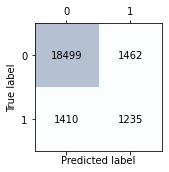

In [80]:
# graph a confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
      ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()
print(' \n')

> Note the discrepency between accuracy and F$_1$.  This skew is caused by the severe class imbalance. The confusion matrix and the F$_1$ score paint a more honest picture.  The accuracy reflects the (skewed) distribution of the class label in the data set. 

*** 
# Exercise #4 - Bagger
*** 

##### 4.1 Bag your decision tree

* use a `BaggingClassifier` (see [api](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))
* use your tree from Ex.#3
* use 100 estimators
* `bootstrap=True`
* `random_state=1`
* `n_jobs=-1`

In [81]:
# build bagger
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=100,
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)
bag

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,


###### Self Check

```python
BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
                                                        splitter='best'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=False,
                  random_state=1, verbose=0, warm_start=False)
```

##### 4.2 Train and test bagger

* predict both `X_train` and `X_test`
* save predictions for both (e.g., `y_train_pred` and `y_test_pred`)

In [82]:
# train bagger
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.903


##### 4.3 Determine accuracy and F$_1$ score (train and test)

In [83]:
# print accuracy and F1
print('accuracy train: ', accuracy_score(y_train, y_train_pred))
print('f1 train: ', f1_score(y_train, y_train_pred))
print('accuracy test: ', accuracy_score(y_test, y_test_pred))
print('f1 test: ', f1_score(y_test, y_test_pred))

accuracy train:  0.9999115239991152
f1 train:  0.9996216420734014
accuracy test:  0.9032557728036804
f1 test:  0.5181758096497026


##### 4.4 Plot a confusion matrix (test set)

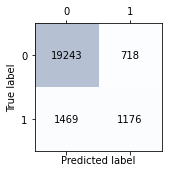

In [84]:
# graph a confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
      ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()
print(' \n')

*** 
# Exercise #5 - Boosting
*** 

##### 5.1 Boost your decision tree

* construct an `AdaBoost` model (see [api](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html))
* use your tree from Ex.#3
* use 100 estimators
* `learning_rate=0.1`
* `random_state=1`

In [85]:
# build AdaBoost
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=100, 
                         learning_rate=0.1,
                         random_state=1)
ada

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

> For bagging, you could parallelize with `n_jobs` parameter.  There is no such option for AdaBoost. **Why is this?** 
>
> Consider the fundamental differences between the two approaches (see "flowchart" images in Lecture 12). 

###### Self Check

```python
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=1,
                                                         splitter='best'),
                   learning_rate=0.1, n_estimators=100, random_state=1)
```                   

##### 5.2 Train and test AdaBoost

* predict both `X_train` and `X_test`
* save predictions for both (e.g., `y_train_pred` and `y_test_pred`)

In [86]:
# train AdaBoost
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# test Decision Tree
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.873


##### 5.3 Determine accuracy and F$_1$ score (train and test)

In [87]:
# print accuracy and F1
print('accuracy train: ', accuracy_score(y_train, y_train_pred))
print('f1 train: ', f1_score(y_train, y_train_pred))
print('accuracy test: ', accuracy_score(y_test, y_test_pred))
print('f1 test: ', f1_score(y_test, y_test_pred))

accuracy train:  1.0
f1 train:  1.0
accuracy test:  0.8729540829868176
f1 test:  0.46237364283040056


##### 5.4 Plot a confusion matrix (test set)

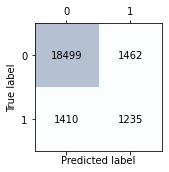

In [88]:
# graph a confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
      ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()
print(' \n')

*** 
# Exercise #6 - Go big or go home$^1$
*** 

> $^1$ ... *but it's March Mayteenth, 2020. I'm already at home.*

##### 6.1 Run the entire Activity 12 again on `'bank-full.csv'`.

In the dataset section, switch `dat_file` to be `'bank-full.csv'`.
```python
#dat_file = 'bank.csv'           # exercise 1-5
dat_file = 'bank-full.csv'        # exercise 6  
```

> `'bank-full.csv'` be 10 times mo' biggly than `'bank.csv'`

**Remember** to change back and re-run to the smaller `'bank.csv'` before answering the Canvas questions. 